In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

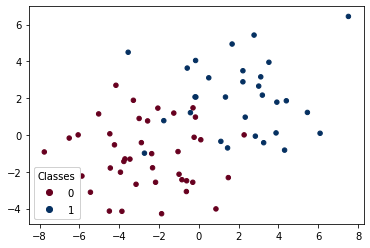

In [82]:
# licznosci klas
n1 = 40
n2 = 30

# macierz kowariancji
cov = np.array([[4,0],[0,4]])

# generowanie punktów klasy 1 z rozkładu Gaussa o zadanej średniej
mean_1 = np.array([-3,-1])
c1 = np.random.multivariate_normal(mean_1, cov, n1)

# generowanie punktów klasy 2 z rozkładu Gaussa o zadanej średniej
mean_2 = np.array([2,2])
c2 = np.random.multivariate_normal(mean_2, cov, n2)

# storzenie jednej macierzy z danymi obu klas wraz z przypisaniem im etykiety klas(0/1)
X = np.r_[c1,c2]
Y = np.hstack((np.zeros(n1), np.ones(n2)))

# rysowanie wykresu z 2 klasami i legenda
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0],X[:,1], c=Y,cmap="RdBu", s = 20)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# granice osi X i Y
lim = plt.axis()
plt.axis(lim)
plt.show()

In [83]:
# I - naiwny klasyfikator Bayesa ze wzoru

# Prawdopodbieństwa a priori
pi1 = n1/(n1+n2)
pi2 = n2/(n1+n2)

# estymowanie średnich w klasach
me1 = np.mean(c1, axis = 0)
me2 = np.mean(c2, axis = 0)

# estymowanie macierzy kowariancji w klasach
se1 = np.cov(c1.T)
se2 = np.cov(c2.T)

# Macierz kowariancji do metody LDA tożsama z macierzą W
se = ((n1 - 1) * se1 + (n2 - 1) * se2) / (n1 + n2 - 2)

Przekształcając równanie prostej dyskryminacyjnej: 

![title](1.PNG)

![title](2.PNG)

In [84]:
# wektor a oraz wyraz b
a = (me1 - me2).T @ np.linalg.inv(se)
b = math.log(pi2/pi2) - 0.5 * a @ (me1 + me2)

# wyraz wolny B i współczynnik kierunkowy A
B = -b / a[1]
A = -a[0] / a[1]

In [85]:
# II - naiwny klasyfikator Bayesa z bibiloteki scikit-learn

model = GaussianNB()
model.fit(X,Y)

# próba ucząca to nasz zbiór 2 klas
ynew = model.predict(X)

# rozpięcie siatki na współrzędnych
xx, yy = np.meshgrid(np.linspace(lim[0], lim[1]),np.linspace(lim[2], lim[3]))

# przewidywanie prawdopodobieństw
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

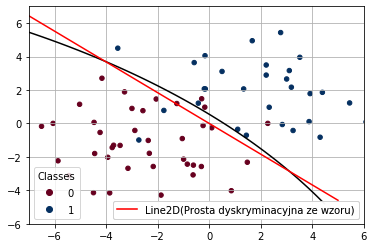

In [87]:
# rysowanie punktów wraz z dwoma liniami dyskryminującymi na jednym wykresie
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0],X[:,1], c=Y,cmap="RdBu", s = 20)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# rysowanie prostej dyskryminującej 2 klasy ze wzoru
x = np.linspace(-7,5)
y = A * x
line = ax.plot(x,y,"r",color="red",label = 'Prosta dyskryminacyjna ze wzoru')
legend2 = ax.legend(line,loc="lower right")
ax.add_artist(legend2)

# rysowanie prostej dyskryminującej 2 klasy naiwnego klasyfikatora Bayesa
plt.contour(xx, yy, Z, [0.5],colors="k")
plt.grid()
plt.xlim(-7,6)
plt.ylim(-6,7)
plt.show()